# Freedmen's Bureau Analysis 

## Task #0: Configure an LLM

### Import libraries that we'll use in this notebook

In [1]:
import ollama
import openai


### Configure OpenAI & Llama-2 LLMs

In [113]:
import ollama
response = ollama.chat(model='llama2', messages=[
  {
    'role': 'user',
    'content': 'Please write me a short story about a data scientist that makes a huge discovery when analyzing historical documents. Make it kind of funny.',
    
  },
])
print(response['message']['content'])


 Title: The Great Document Dumpster Fire

Dr. Emma Thompson, a brilliant data scientist, was on the brink of a major breakthrough. She had been pouring over a trove of ancient texts, searching for patterns and trends that could change the course of history. It was a daunting task, but Emma was undeterred. She was on a mission to unlock the secrets of the past.

As she delved deeper into the texts, Emma began to notice something strange. The more she read, the more she realized that these historical documents were not just dry, dusty relics of the past – they were actually quite funny. Like, laugh-out-loud funny.

Take, for example, the ancient Egyptian "Tome of the Pharaohs." It was a tome indeed, filled with endless lists of taxes, wars, and royalty. But amidst all the seriousness, Emma stumbled upon a passage that read: "King Tut's favorite snack was definitely not rabbit food – trust us on this one."

Or how about the medieval "Sagas of the Knights"? These were supposed to be epic 

## Task #1: Parse Entitities from Simple Examples (Warmup)

### Samples to be able to parse correctly

In [114]:

inputs = [
    "John James agrees to pay $50/month to RJ Hampshire for work on the Farm",
    "Elizabeth James will pay $30 per month to Levi Rodgers for Gardening",
    "Johnson Ollaman will pay $1.25 per day to both John Smith and Jane Smith for teaching the children of the community",
    "Claire Daniels charges $50 weekly to local community members for cooking classes, emphasizing the joy of healthy eating.",
    "Marcus Wellby commits to donating $500 annually to the Green Earth Foundation for environmental conservation efforts.",
    "Dr. Helena Russell charges $100 per hour for providing guidance and support to medical students, aiming to enhance their clinical skills and knowledge.",
    "Keith Galli charges $0 to watch his YouTube content; the least you could do is smash that like button and subscribe, hehehe xD",
    "The local sports club agrees to pay $75 each to coaches Sarah Miller, Danny Glover, Alex Reed, and Jamie Fox for conducting a weekend sports clinic.",
    """This Agreement made this 14th day of August A.D. 1865, by and between F.R.J. Terry of the county of Copiah and State of Mississippi of the first part, and the person hereinafter named and undersigned, Freedmen of the second part [[?]] That for the purpose of working in the [[?]] known as Beagley's [[?]] Yard in the county aforesaid for two months commencing on the 14th day of August 1865 and terminating on the 14th day of October 1865. The said F.R.J. Terry party of the first part, in consideration of the [[?]] and conditions hereinafter mentioned on the part of the party of the second part agrees to pay said laborer "10" ten dollars per month and furnish free of charge clothing and good of good quality and sufficient quantity, good and sufficient quarters, and kind and humane treatment. And it is further agreed that in case the said F.R.J. Terry shall fail, neglect, or refuse to fulfill any of the obligations assumed by him, he shall besides the legal recourse left to the party aggrieved render this contract liable to amendment by the Provost Marshal of Freedmen. And it is agreed on the part of the party of second part that he will well and faithfully perform such labor as the said F.R.J. Terry may require of him for the time aforesaid, nor exceeding ten hours per day in summer and nine hours in winter. And in case the said laborer shall absent himself from or refuse to perform the labor herein promised, he shall loose the time and be punished as such manner as the Provost Marshal shall deem propper.""",
]

outputs = [
    [{"payer": "John James", "recipient": "RJ Hampshire", "amount": 50, "pay frequency": "monthly", "description": "farming"}],
    [{"payer": "Elizabeth James", "recipient": "Levi Rodgers", "amount": 30, "pay frequency": "monthly", "description": "gardening"}],
    [{"payer": "Johnson Ollaman", "recipient": "John Smith", "amount": 1.25, "pay frequency": "daily", "description": "teaching the children of the community"}, {"payer": "Johnson Ollaman", "recipient": "Jane Smith", "amount": 1.25, "pay frequency": "daily", "description": "teaching the children of the community"}],
    [{"payer": "Claire Daniels", "recipient": "Local community members", "amount": 50, "pay frequency": "weekly", "description": "cooking classes"}],
    [{"payer": "Marcus Wellby", "recipient": "Green Earth Foundation", "amount": 500, "pay frequency": "yearly", "description": "donation for environmental conservation"}],
    [{"payer": "Dr. Helena Russell", "recipient": "Medical students", "amount": 100, "pay frequency": "hourly", "description": "mentorship and clinical skill enhancement"}],
    [{"payer": None, "recipient": "Keith Galli", "amount": 0, "pay frequency": None, "description": "YouTube content"}],
    [{"payer": "The local sports club", "recipient": "Sarah Miller", "amount": 75, "pay frequency": "one-time", "description": "weekend sports clinic"},
     {"payer": "The local sports club", "recipient": "Danny Glover", "amount": 75, "pay frequency": "one-time", "description": "weekend sports clinic"},
     {"payer": "The local sports club", "recipient": "Alex Reed", "amount": 75, "pay frequency": "one-time", "description": "weekend sports clinic"},
     {"payer": "The local sports club", "recipient": "Jamie Fox", "amount": 75, "pay frequency": "one-time", "description": "weekend sports clinic"}],
    [{"payer": "F.R.J. Terry", "payee": "Freedmen", "amount":10, "pay frequency": "monthly", "description": "working in the yard"}],
]

In [139]:

from langchain_community.chat_models import ChatOllama
from langchain_openai.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

# llm = ChatOllama(model="llama2", format="json")
# llm = ChatOpenAI()


system_message = """Grab the payer, recipient, amount, pay frequncy, and description from any sentence you're giving

output the following JSON object
{{"results" : [{{
"payer": "<name of payer>",
"recipient": "<name of recipient>",
"amount": <amount in USD>, 
"frequency": "<frequency of payment>", # can only be one from "hourly", "daily", "weekly", "monthly", "yearly", or "other"
"description": "<what the payment was for>"
}}], {{ <ITEM 2> }}, {{ <ITEM 3> }}]
}}

IMPORTANT: return only the json and nothing else. 

Note if there are multiple people being paid, each should have a full entry in the results list
"""

messages = [
    SystemMessage(
        content=system_message
    ),
    HumanMessage(
        content=inputs[2]
    ),
    AIMessage(
        content=str(outputs[2])
    ),
    HumanMessage(
        content=inputs[-2]
    ),
]

chat_model_response = llm.invoke(messages)
print(chat_model_response.content)



AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sldkfjaslf. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [137]:
import json

response_dict = json.loads(chat_model_response.content)

In [138]:
response_dict["results"][0]["recipient"]

'Sarah Miller'

### Your code here

## Task #2a: Grab Apprenticeship Agreement Rows from Kaggle

In [148]:
import pandas as pd

df = pd.read_csv("./data/contract-records.csv")
df["transcription_text"] = df["transcription_text"].str.replace("_x000D_", " ")

In [149]:
import pandas as pd
df.head()

# Set the display options
pd.set_option('display.max_colwidth', None)

# FILEPATH: /Users/keithgalli/YouTube/code/historical-docs-analysis/analysis.ipynb
df.head()


,project_id,category,sub_category,transcription_text,document_url
0,11406,Contracts,Apprenticeship Agreement,Copy \n \nAgreement of Apprenticeship \nBu \nMrs. Kate V.Chamblin \nof the first part and \n \n1st Lt. Geo. W. Rollins \nV.R.C. U.S. Army Agt \nfor Carroll Parish La. of \nthe second part \n \nMinor Orphans Freed \nJames Samenett \nBetty Taylor \nMary Taylor \n \nLake Providence \nCarroll Parish La \nDated Oct. 1 1866 \nExec'd Nov. 3 1866 \n,https://transcription.si.edu/transcribe/11406/NMAAHC-004567395_00439
1,11406,Contracts,Apprenticeship Agreement,"[H 132 ENCL] \n \nCopy \n \nAgreement of Apprenticeship. \n \nThis agreement in two parts made & entered into this 1"" day of October A. D. 1866 by & between Mrs Kate V. Chambliss of the first part and 1st Lieut Geo. W. Rollins Vet Res. Corps U.S.A. Agent for Carroll Parish La. Bur of Ref. Freedn & Aband Lands La and by virtue of authority contained in Circular No 25 dated Hd. Qrs. Bur Ref Freedn & Abd Lands New Orleans Louisiana Octr 31"" 1865 Guardian for Minors & orphans of Freedmen for Carroll Parish La party hereto of the second part. Witnesseth That James Samenett, Betty Taylor and Mary Taylor minor orphans of African decent are hereby bound & apprenticed to service to the said Mrs Kate V. Chambliss party of the first part & undersigned during their years of minority commencing & ending as follows: James Samenett aged 14 years, commencing on the 1"" day of Oct. A. D. 1866 & terminating on the 1"" day of October 1870. Betty Taylor aged 9 years commencing on the 1"" day of Oct. A. D. 1866 & ending on the 1"" day of Oct. A. D. 1872. Mary Taylor aged 7 years commencing on the 1"" day of October A. D. 1866 & terminating on the 1"" day of October A. D. 1874. And it",https://transcription.si.edu/transcribe/11406/NMAAHC-004567395_00440
2,11406,Contracts,Apprenticeship Agreement,"is agreed on the part of the party of the first part & undersigned Mrs Kate V. Chambliss that for the consideration of the faithfull services to be rendered by the within named & said minor orphans the said minor orphans shall receive comfortable clothing, board medical treatment when sick, a reasonable amount of schooling and permission to attend church each Sabbath and at the end or termination of their term of apprenticeship the said minor orphans shall be allowed to retain all articles of their personal apparel. \n \nThe said parties do hereby mutually agree that all laws or parts of laws enacted or that may be enacted by the United States or the State of Louisiana establishing laws for the welfare or government of Freedmens minors or orphans or for the government of the same under laws establishing the Bur of Ref Freed & Ab^d Lands or in any way affecting the provisions of this agreement is & shall be made a part of this agreement and that all laws applying to white minors or orphans shall be extended to the said & within named minor orphans during the conti-",https://transcription.si.edu/transcribe/11406/NMAAHC-004567395_00441
3,11406,Contracts,Apprenticeship Agreement,"continuance of this agreement & finally that this agreement shall expire & terminate when the aforesaid minor male orphan shall have arrived at the age of eighteen years and the minor female orphans shall have arrived at the age of fifteen years respectively. \n \nIn testimony whereof the said parties have hereunto affixed their names to this agreement. Done at Lake Providence Louisiana Parish of Carroll on the third day of November A. D. 1866. \n \nsigned Kate V. Chambliss \nsigned Geo. W Rollins \n1st Lieut. VRC. U.S. Army \nAgent for Carrol Parish \nLa. Bureau of R. F. & A Lands \nLouisiana \n \nExecuted in Presence of \nSigned Ben C. Johnson \nJackson Chambliss \nJohn A. Ginst [[?]] \n \n[[image - three boxes oriented vertically representing Internal Revenue Stamps that appeared on original document, reading as follows: 2¢ / Int Rev / [[illegible]]; a single illegible initial appears beneath each ""stamp""]] \n \nI certify 

## Task #2: Connect pages that belong to the same document

## Task #3: Grab Apprenticeship info from CSV

In [189]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/historical-docs-analysis/master/data/task3-merged-apprenticeship-agreements.csv')


{"apprentice_name": "James Samenett", "apprentice_age": 14, "county": "Caroll Parish", "state": "Louisiana", "mentor": "Mrs Kate V. Chambliss" }



{'apprentice_name': 'James Samenett',
 'apprentice_age': 14,
 'county': 'Caroll Parish',
 'state': 'Louisiana',
 'mentor': 'Mrs Kate V. Chambliss'}

In [190]:
from langchain_community.chat_models import ChatOllama
from langchain_openai.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

# llm = ChatOllama(model="llama2", format="json")
llm = ChatOpenAI()

def get_output(input_text):
    try:
        system_message = """Your job is to parse out information about apprenticeship agreement contracts in the United States.

        output the following JSON object
        {{"results" : [{{
        "apprentice_name": "<name of apprentice>",
        "apprentice_age": <age of apprentice>, # in years
        "mentor_name": "<name of person taking in the apprentice>", 
        "county": "< the county where the contract was made>", # can only be one from "hourly", "daily", "weekly", "monthly", "yearly", or "other"
        "state": "< the state where the contract was made>" # write out full state, not just abbreviation 
        }}], {{ <ITEM 2> }}, {{ <ITEM 3> }}]
        }}

        IMPORTANT: return only the json and nothing else. 

        Note if there are multiple apprentices in a single document, create a dictionary item entry for each one in the results list
        """

        messages = [
            SystemMessage(
                content=system_message
            ),
            HumanMessage(
                content=input_text
            ),
        ]

        chat_model_response = llm.invoke(messages, timeout=20)
        return chat_model_response.content
    except Exception as e:
        return None



In [191]:
df_small = df.head(50).copy()

for index, row in df_small.iterrows():
    print(index)
    input_text = row["transcription_text_aggregated"]
    output = get_output(input_text)

    df_small.loc[index, "output_json"] = output
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [193]:
df_small.head()
df_small.to_csv("task4-parsed-small.csv", index=False)

## Task #4: Analyze Results

In [205]:
df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/historical-docs-analysis/master/data/task4-parsed-apprenticeship-agreements.csv")


In [203]:
# Find the average age of apprentices
info_list = []

for index, row in df.iterrows():
    try:
        output_dict = json.loads(row["output_json"])
        results_list = output_dict["results"]
        for result in results_list:
            info_list.append(result)
    except Exception as e:
        print(e)




Expecting value: line 7 column 19 (char 140)
Expecting value: line 7 column 19 (char 136)
the JSON object must be str, bytes or bytearray, not float
Expecting value: line 7 column 19 (char 119)
Expecting value: line 7 column 19 (char 122)
Expecting value: line 7 column 19 (char 121)
Expecting value: line 7 column 19 (char 124)
Expecting value: line 7 column 19 (char 119)
Expecting value: line 7 column 19 (char 131)
Expecting value: line 7 column 19 (char 128)
Expecting value: line 7 column 19 (char 124)
Expecting value: line 7 column 25 (char 140)
Expecting value: line 7 column 19 (char 134)
Expecting value: line 7 column 25 (char 153)
Expecting value: line 7 column 19 (char 125)
Expecting value: line 7 column 19 (char 131)
Expecting value: line 7 column 19 (char 117)
Expecting value: line 8 column 10 (char 138)
Expecting value: line 8 column 10 (char 129)
Expecting value: line 7 column 19 (char 121)
Expecting value: line 7 column 19 (char 134)
Expecting value: line 7 column 19 (char 1

In [213]:
info_list[0]

{'official': 'Ben C. Johnson',
 'mentor': 'Kate V. Chamblin',
 'apprentice_name': 'James Samenett',
 'apprentice_age': 14,
 'state': 'Louisiana',
 'county': 'Carroll Parish'}

In [210]:
age_counts = {}

for info in info_list:
    age = info.get("apprentice_age")
    if isinstance(age, int):
        if age < 25:
            if age in age_counts:
                age_counts[age] += 1
            else:
                age_counts[age] = 1

age_counts

{14: 69,
 9: 124,
 7: 116,
 20: 1,
 18: 13,
 8: 124,
 5: 67,
 10: 145,
 3: 30,
 6: 98,
 12: 147,
 13: 123,
 2: 16,
 4: 39,
 11: 153,
 15: 55,
 17: 18,
 16: 27,
 19: 2,
 0: 1,
 1: 4,
 21: 3}

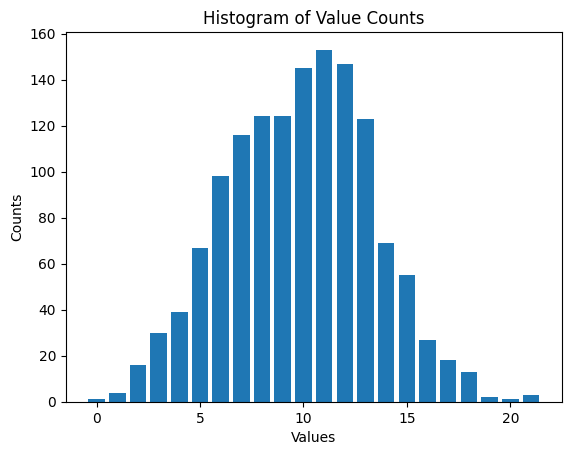

In [211]:
import matplotlib.pyplot as plt

# Dictionary mapping values to counts
data = age_counts

# Extract values and counts from the dictionary
values = list(data.keys())
counts = list(data.values())

# Create a bar plot
plt.bar(values, counts)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Histogram of Value Counts')

# Display the plot
plt.show()


In [216]:
mentor_counts = {}

for info in info_list:
    mentor = info.get("mentor")

    if mentor in mentor_counts:
        mentor_counts[mentor] += 1
    else:
        mentor_counts[mentor] = 1

mentor_counts_copy = mentor_counts.copy()
for key,value in mentor_counts_copy.items():
    if value < 10:
        mentor_counts.pop(key)


In [218]:
mentor_counts

{'James Conoly': 11,
 'Clinton A. Cilley': 18,
 None: 20,
 'J H Bassler': 23,
 'Asa Teal': 21,
 'H H Foster': 29}

TypeError: 'value' must be an instance of str or bytes, not a None

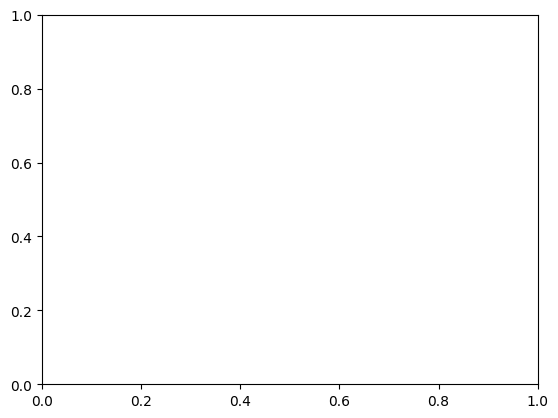

In [217]:
import matplotlib.pyplot as plt

# Dictionary mapping values to counts
data = mentor_counts

# Extract values and counts from the dictionary
values = list(data.keys())
counts = list(data.values())

# Create a bar plot
plt.bar(values, counts)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Histogram of Value Counts')

# Display the plot
plt.show()